<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df_train = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/train.csv")
df_lightgbm5 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving5.csv", header=None)
df_prophet6 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving6.csv", header=None)
df_prophet9 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving9.csv", header=None)
sample_submit = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/sample_submit.csv", header=None)

In [41]:
# 2015年度のデータをbaselineとする
df_train_bl = df_train[-366:].reset_index(drop=True)
df_train_bl.head()

,datetime,y,client,close,price_am,price_pm
0,2015-04-01,61,1,0,3,3
1,2015-04-02,60,1,0,2,2
2,2015-04-03,75,1,0,2,1
3,2015-04-04,86,1,0,4,3
4,2015-04-05,69,1,0,2,2


In [42]:
df_lightgbm5.columns = ['datetime', 'y']
df_prophet6.columns = ['datetime', 'y']
df_prophet9.columns = ['datetime', 'y']

In [43]:
df_lightgbm5.head()

,datetime,y
0,2016-04-01,68.228807
1,2016-04-02,65.349049
2,2016-04-03,64.418783
3,2016-04-04,64.757358
4,2016-04-05,55.602259


In [44]:
df_diff = df_lightgbm5.copy()
df_diff["yhat6"] = df_prophet6["y"]
df_diff["yhat9"] = df_prophet9["y"]
df_diff["yhat_diff69"] = df_prophet9["y"] - df_prophet6["y"]

pd.set_option('display.max_rows', None)
df_diff

,datetime,y,yhat6,yhat9,yhat_diff69
0,2016-04-01,68.228807,76.830758,82.849854,6.019096
1,2016-04-02,65.349049,83.676622,90.433463,6.756841
2,2016-04-03,64.418783,77.241140,83.721052,6.479911
3,2016-04-04,64.757358,68.619467,74.731621,6.112154
4,2016-04-05,55.602259,61.643520,67.385577,5.742057
5,2016-04-06,51.868016,58.590713,64.206428,5.615716
6,2016-04-07,49.928263,57.274927,62.848485,5.573558
7,2016-04-08,58.617816,60.073126,65.912146,5.839020
8,2016-04-09,59.084288,67.488300,73.822140,6.333841
9,2016-04-10,61.713682,61.374915,67.143169,5.768254


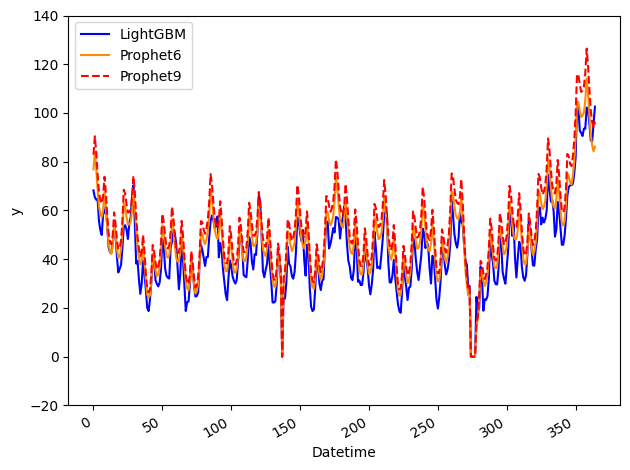

In [45]:
fig, ax = plt.subplots()

# ax.plot(df_train_bl['y'], ls='--', label='Baseline')
ax.plot(df_lightgbm5['y'], color='blue', label='LightGBM')
ax.plot(df_prophet6['y'], color='darkorange', label='Prophet6')
ax.plot(df_prophet9['y'], ls='--', color='red', label='Prophet9')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(-20, 140)

fig.autofmt_xdate()
plt.tight_layout()

In [46]:
df_diff["yhat_ensem69"] = df_prophet9["y"]*0.5 + df_prophet6["y"]*0.5

In [47]:
df_submit = pd.DataFrame({
    'datetime': sample_submit.iloc[:, 0].reset_index(drop=True),
    'y': df_diff["yhat_ensem69"].reset_index(drop=True)
})

display(df_submit.head(), df_submit.tail())

,datetime,y
0,2016-04-01,79.840306
1,2016-04-02,87.055043
2,2016-04-03,80.481096
3,2016-04-04,71.675544
4,2016-04-05,64.514548


,datetime,y
360,2017-03-27,104.232030
361,2017-03-28,95.830793
362,2017-03-29,91.522598
363,2017-03-30,89.057322
364,2017-03-31,91.331016


In [48]:
df_submit.to_csv("submit_moving12.csv", index=False, header=False)